In [98]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [99]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import re
import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [100]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [101]:
name_of_project = 'FaceFats'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/FaceFats/o3on' and 'Projects/FaceFats/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [102]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'FaceFats'
Project_Folder_data = Project + Project_Name + '/mzml_brain5xFAD_OzON/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'FaceFats'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: FaceFats
Project_Folder_data: ./Projects/FaceFats/mzml_brain5xFAD_OzON/
Project_results: ./Projects/FaceFats/results/
file_name_to_save: FaceFats
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [103]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [104]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD93_F4_5xFAD_cereb_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD93_F4_5xFAD_cortex_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD93_F4_5xFAD_dienc_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD93_F4_5xFAD_hippo_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD94_F4_5xFAD_cereb_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD94_F4_5xFAD_cortex_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD94_F4_5xFAD_dienc_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_DOD94_F4_5xFAD_hippo_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_brain5xFAD_OzON/11292023_FAD185_M1_5xFAD_

In [105]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,25452.201778,NaN,584.4,437.3,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
1,NaN,23887.601665,NaN,612.4,437.3,11292023_DOD93_F4_5xFAD_cereb_O3on_01,612.4 -> 437.3
2,NaN,32008.842213,NaN,622.5,503.4,11292023_DOD93_F4_5xFAD_cereb_O3on_01,622.5 -> 503.4
3,NaN,28793.361992,NaN,624.5,505.4,11292023_DOD93_F4_5xFAD_cereb_O3on_01,624.5 -> 505.4
4,NaN,25249.781784,NaN,626.5,437.3,11292023_DOD93_F4_5xFAD_cereb_O3on_01,626.5 -> 437.3
...,...,...,...,...,...,...,...
14395,TAG,25292.741741,"[TG(57:9),TG(56:2)]_FA18:1",932.9,633.6,11292023_FAD189_M2_5xFAD_hippo_O3on_01,932.9 -> 633.6
14396,TAG,23646.801674,"[TG(58:7),TG(57:0)]_FA18:1",950.9,651.6,11292023_FAD189_M2_5xFAD_hippo_O3on_01,950.9 -> 651.6
14397,TAG,23767.581665,"[TG(59:13),TG(58:6)]_FA18:1",952.8,653.5,11292023_FAD189_M2_5xFAD_hippo_O3on_01,952.8 -> 653.5
14398,TAG,23726.221684,"[TG(59:12),TG(58:5)]_FA18:1",954.8,655.5,11292023_FAD189_M2_5xFAD_hippo_O3on_01,954.8 -> 655.5


In [106]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,584.4,437.3,0.044183,41.720001,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
1,NaN,584.4,437.3,0.088567,41.680004,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
2,NaN,584.4,437.3,0.132967,41.240002,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
3,NaN,584.4,437.3,0.177367,41.800003,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
4,NaN,584.4,437.3,0.221783,41.640003,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
...,...,...,...,...,...,...,...
8107107,NaN,956.9,657.6,24.779100,42.380005,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6
8107108,NaN,956.9,657.6,24.823517,42.180004,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6
8107109,NaN,956.9,657.6,24.867917,42.180004,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6
8107110,NaN,956.9,657.6,24.912317,42.240002,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [107]:
d1 = df_OzESI.iloc[:,1:9]

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (9.5, 21.5)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
d1a = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
# filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
d1a

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
213,584.4,437.3,9.502833,41.660004,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
214,584.4,437.3,9.547233,41.900002,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
215,584.4,437.3,9.591633,41.660004,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
216,584.4,437.3,9.636050,41.700005,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
217,584.4,437.3,9.680450,41.640003,11292023_DOD93_F4_5xFAD_cereb_O3on_01,584.4 -> 437.3
...,...,...,...,...,...,...
8107029,956.9,657.6,21.315350,41.960003,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6
8107030,956.9,657.6,21.359767,42.100002,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6
8107031,956.9,657.6,21.404167,42.140003,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6
8107032,956.9,657.6,21.448583,42.160004,11292023_FAD189_M2_5xFAD_hippo_O3on_01,956.9 -> 657.6


In [108]:
# from collections import defaultdict

# def add_lipid_info(matched_dataframe, db_pos, tolerance=0.3):
#     """
#     Adds lipid information to the data frame based on matched ions within a certain tolerance.

#     :param matched_dataframe: DataFrame containing matched lipids and ion data.
#     :param db_pos: List of integer values representing the positions in the OzESI list to be checked.
#     :param tolerance: The acceptable difference between ion values to be considered a match.

#     :return: Updated DataFrame with added lipid information.
#     """
#     working_dataframe = matched_dataframe.copy()  # Create a copy for processing
#     final_dataframe = matched_dataframe.copy()    # Create a copy for final output

#     # Convert respective column values to float for given db_pos
#     for position in db_pos:
#         working_dataframe['n-' + str(position)] = working_dataframe['n-' + str(position)].astype(float)

#     # Iterate over the rows of the DataFrame to match lipids
#     for i in range(len(working_dataframe)):
#         if pd.isna(working_dataframe.loc[i, 'Lipid']):
#             parent_ion = working_dataframe.loc[i, 'Parent_Ion']

#             # Look for matching ions within tolerance
#             for j in range(len(working_dataframe)):
#                 current_row = working_dataframe.loc[j].copy()

#                 # If the parent ion is within tolerance and the Lipid column is a string
#                 for n in db_pos:
#                     print(f"Checking match for Parent_Ion: {parent_ion}, n-{n}: {current_row[f'n-{n}']}, Lipid: {current_row['Lipid']}")
                    
#                     if within_tolerance(parent_ion, current_row[f'n-{n}'], tolerance) and isinstance(current_row['Lipid'], str):
#                         working_dataframe.loc[i, 'Lipid'] = current_row['Lipid']
#                         working_dataframe.loc[i, 'db_pos'] = f'n-{n}' + current_row['db_pos']

#                         # Append to the final_dataframe
#                         appended_row = working_dataframe.loc[i].copy()
#                         appended_row['db_pos'] = f'n-{n}' + current_row['db_pos']
#                         final_dataframe = final_dataframe.append(appended_row, ignore_index=True)

#     # Drop rows in the final_dataframe where 'Lipid' column value is NaN
#     final_dataframe.dropna(subset=['Lipid'], inplace=True)

#     return final_dataframe

# def within_tolerance(a, b, tolerance=0.3):
#     """
#     Checks if the absolute difference between two values is within a given tolerance.
    
#     :param a: First value to compare.
#     :param b: Second value to compare.
#     :param tolerance: The acceptable difference between the two values. Defaults to 0.3.
    
#     :return: Boolean indicating whether the difference is within the given tolerance.
#     """
#     return abs(a - b) <= tolerance


# def match_lipids_parser(mrm_database, df, tolerance=0.3):
#     """
#     Performs lipid matching by creating an ion dictionary from the MRM database and applying the match_ions function to each row of a DataFrame.
    
#     :param mrm_database: DataFrame containing MRM database information.
#     :param df: DataFrame containing ion information to be matched.
#     :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
#     :return: DataFrame with matched lipid and class information if matches were found.
#     """
#     ion_dict = create_ion_dict(mrm_database)
#     df_matched = df.apply(lambda row: match_ions(row, ion_dict=ion_dict, tolerance=tolerance), axis=1)
#     return df_matched

# def create_ion_dict(mrm_database):
#     """
#     Creates a dictionary of ions from an MRM database DataFrame.
    
#     :param mrm_database: DataFrame containing MRM database information.
    
#     :return: A dictionary with ion pairs as keys, and a list of tuples containing corresponding lipid and class as values.
#     """
#     ion_dict = defaultdict(list)
#     for index, row in mrm_database.iterrows():
#         ion_dict[(row['Parent_Ion'], row['Product_Ion'])].append((row['Lipid'], row['Class']))
#     return ion_dict


# def match_ions(row, ion_dict, tolerance=0.3):
#     """
#     Matches the ions in a DataFrame row with the ions in an ion dictionary.
    
#     :param row: A DataFrame row containing 'Parent_Ion' and 'Product_Ion' columns.
#     :param ion_dict: A dictionary of ion pairs and their corresponding lipid and class information.
#     :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
#     :return: The original row updated with matched lipid and class information if matches were found.
#     """
#     ions = (row['Parent_Ion'], row['Product_Ion'])
#     matched_lipids = []
#     matched_classes = []

#     for key, value in ion_dict.items():
#         if within_tolerance(ions[0], key[0], tolerance) and within_tolerance(ions[1], key[1], tolerance):
#             matched_lipids.extend([match[0] for match in value])
#             matched_classes.extend([match[1] for match in value])

#     if matched_lipids and matched_classes:
#         row['Lipid'] = ' | '.join(matched_lipids)
#         row['Class'] = ' | '.join(matched_classes)

#     return row



# def match_lipids_with_rt(df, df_MRM_RT_correct, ion_tolerance=0.3, rt_tolerance=0.3):
#     """
#     Performs lipid matching based on both ion values and retention time.

#     :param df: DataFrame containing ion information to be matched.
#     :param df_MRM_RT_correct: DataFrame containing the MRM database information with retention time.
#     :param ion_tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
#     :param rt_tolerance: The acceptable difference between retention times to be considered a match. Defaults to 0.5.

#     :return: DataFrame with matched lipid, class, and retention time information if matches were found.
#     """

 

#     # Merging the MRM database with the input DataFrame on ion values within the specified ion tolerance
#     merged_df = pd.merge(df, df_MRM_RT_correct, on=['Parent_Ion', 'Product_Ion'], how='inner')

#     # Filter the merged DataFrame based on the ion and retention time tolerance
#     matched_df = merged_df[
#         (abs(merged_df['Retention_Time'] - merged_df['Retention_Time']) <= rt_tolerance) &
#         (abs(merged_df['Parent_Ion'] - merged_df['Parent_Ion']) <= ion_tolerance) &
#         (abs(merged_df['Product_Ion'] - merged_df['Product_Ion']) <= ion_tolerance)
#     ]

#     # Selecting relevant columns and renaming them if necessary
#     matched_df = matched_df[['Lipid', 'Parent_Ion', 'Product_Ion', 'Retention_Time']]
#     matched_df.rename(columns={'Retention_Time_x': 'Retention_Time'}, inplace=True)

#     return matched_df


# def calculate_DB_Position(df_matched_ions, db_pos_list=[7,9,12]):
#     """
#     Creates a new DataFrame to store the DB_Position and Aldehyde_Ion values,
#     and calculate n-i values for the given db_pos_list.
    
#     Parameters:
#         df_matched_ions (pd.DataFrame): Input DataFrame containing matched ions.
#         db_pos_list (list): List of OzESI positions to calculate n-i values.
        
#     Returns:
#         pd.DataFrame: Modified DataFrame with new calculated columns for n-i values.
#     """
#     # Create a DataFrame to store the DB_Position and corresponding Aldehyde_Ion values
#     df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

#     # Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
#     for position in range(3, 21):
#         df_DB_aldehyde.loc[position, 'DB_Position'] = position
#         df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

#     # Loop through the specified db_pos_list
#     for ozesi_position in db_pos_list:
#         # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
#         aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

#         # Calculate and store the n-i value for the current OzESI position
#         df_matched_ions["n-{}".format(ozesi_position)] = df_matched_ions["Parent_Ion"] - aldehyde_ion

#     return df_matched_ions



Correct RTs add DB position based on correct RT CORRECT RT CORRECT RTCORRECT RTCORRECT RT

In [109]:
import re
Correct_RT_directory = 'tools/RT/'
#MRM CORRECT RT DF
df_MRM_RT_correct = pd.read_csv(Correct_RT_directory + 'FF_MRM_CorrectRT_Brain5xFAD_12dec23.csv') #correct MRM RT
df_MRM_RT_correct['Retention_Time'] = df_MRM_RT_correct['Average_Retention_Time'].values


# List of new column names based on db_pos_list
db_column_names = []
db_pos_list = [7, 9, 10, 12]


df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

# Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
for position in range(3, 21):
    df_DB_aldehyde.loc[position, 'DB_Position'] = position
    df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

for number in db_pos_list:
    db_column_names.append(f'n-{number}')

# Create an empty DataFrame with initial columns
df_db_pos = pd.DataFrame(columns=['Lipid', 'Retention_Time', 'Parent_Ion','Product_Ion'])

# Append new column names to the DataFrame
for column_name in db_column_names:
    df_db_pos[column_name] = pd.NA  # Initialize the new columns with NA

# df_DB_aldehyde #aldehyde ion values


#append df_MRM_RT_correct to df_db_pos
df_db_pos = df_db_pos.append(df_MRM_RT_correct, ignore_index=True)


# Loop through the specified db_pos_list
for ozesi_position in db_pos_list:
    # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
    aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

    # Calculate and store the n-i value for the current OzESI position
    df_db_pos["n-{}".format(ozesi_position)] = df_db_pos["Parent_Ion"] - aldehyde_ion


df_db_pos.to_csv('df_db_pos.csv')
# df_MRM_RT_correct  #correct MRM RT
#drop Average_Retention_Time column from df db pos


import pandas as pd
import re

# Assuming df_db_pos is your DataFrame


# Step 1: Delete rows containing 'FA18:2'
df_db_pos = df_db_pos[~df_db_pos['Lipid'].str.contains('FA18:2')]


# Function to extract and sort TG values
def sort_tg_values(lipid):
    tg_values = re.findall(r'TG\((\d+:\d+)\)', lipid)
    tg_values.sort()  # Sorts lexicographically, which works for numbers in the format ##:##
    return tg_values

# Custom sorting key function
def custom_sort_key(row):
    lipid = row['Lipid']
    fa16_priority = 0 if 'FA16:1' in lipid else 1 if 'FA18:1' in lipid else 2
    sorted_tgs = sort_tg_values(lipid)
    return (fa16_priority, sorted_tgs, lipid)

import re

def remove_tg_zero(lipid):
    # Use regular expression to find and remove all occurrences of TG(##:0)
    return re.sub(r'TG\(\d+:0\)', '', lipid).replace(',,', ',').strip(',')

# Apply the function to the 'Lipid' column
df_db_pos['Lipid'] = df_db_pos['Lipid'].apply(remove_tg_zero)


# Apply the sorting
df_db_pos['sort_key'] = df_db_pos.apply(custom_sort_key, axis=1)
df_db_pos.sort_values(by='sort_key', inplace=True)
df_db_pos.drop('sort_key', axis=1, inplace=True)



df_db_pos  






,Lipid,Retention_Time,Parent_Ion,Product_Ion,n-7,n-9,n-10,n-12,Average_Retention_Time
1,[TG(52:5)]_FA16:1,12.40,870.8,599.5,788.8,760.8,746.8,718.8,12.40
0,[TG(50:3)]_FA18:1,13.73,846.8,547.5,764.8,736.8,722.8,694.8,13.73
7,"[TG(55:8),TG(54:1)]_FA18:1",17.19,906.8,607.5,824.8,796.8,782.8,754.8,17.19
8,"[TG(55:9),TG(54:2)]_FA18:1",17.19,904.8,605.5,822.8,794.8,780.8,752.8,17.19
5,"[TG(55:10),TG(54:3)]_FA18:1",15.99,902.8,603.5,820.8,792.8,778.8,750.8,15.99
6,"[TG(55:11),TG(54:4)]_FA18:1",14.84,900.8,601.5,818.8,790.8,776.8,748.8,14.84
3,[TG(54:5)]_FA18:1,13.64,898.8,599.5,816.8,788.8,774.8,746.8,13.64
4,[TG(54:6)]_FA18:1,12.53,896.8,597.5,814.8,786.8,772.8,744.8,12.53
12,"[TG(57:9),TG(56:2)]_FA18:1",18.21,932.9,633.6,850.9,822.9,808.9,780.9,18.21
10,"[TG(57:11),TG(56:4)]_FA18:1",15.90,928.8,629.5,846.8,818.8,804.8,776.8,15.90


Filter through filtered_d1 based on matched OzOFF lipids df_db_pos for n-7 and n-9 values INITIAL RETENTION TIME WINDOW

In [110]:
# Assuming df_db_pos and filtered_d1 are your DataFrames

tolerance = 0.3
retention_time_tolerance = 0.5  # Adjust this value as needed

# Re-initializing an empty DataFrame for filtered_d2
d2 = pd.DataFrame()

# Iterating through df_db_pos
for index, row in df_db_pos.iterrows():
    ground_truth_retention_time = row['Retention_Time']  # Ground truth retention time
    product_ion = row['Product_Ion']
    parent_ion_n7 = row['n-7']
    parent_ion_n9 = row['n-9']
    parent_ion_n10 = row['n-10']
    parent_ion_n12 = row['n-12']
    lipid_name = row['Lipid']  # Extracting Lipid name from df_db_pos

    # Defining the retention time window based on ground truth
    lower_bound_time = ground_truth_retention_time - retention_time_tolerance
    upper_bound_time = ground_truth_retention_time + retention_time_tolerance

    # Defining the tolerance for Parent and Product ions
    lower_bound_ion = product_ion - tolerance
    upper_bound_ion = product_ion + tolerance

    # Filtering filtered_d1 within the specified window and matching ions with tolerance
    matches = d1a[(d1a['Retention_Time'] >= lower_bound_time) & 
                        (d1a['Retention_Time'] <= upper_bound_time) &
                        (d1a['OzESI_Intensity'] >= 300) &
                        (d1a['Product_Ion'] >= lower_bound_ion) &
                        (d1a['Product_Ion'] <= upper_bound_ion)]

    # Adding 'db' and 'Lipid' columns based on the tolerance matching
    matches['db'] = ''
    matches['Lipid'] = lipid_name  # Adding the Lipid name to all matches
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n7 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n7 + tolerance), 'db'] = 'n-7'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n9 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n9 + tolerance), 'db'] = 'n-9'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n10 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n10 + tolerance), 'db'] = 'n-10'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n12 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n12 + tolerance), 'db'] = 'n-12'

    # Append the matching rows to filtered_d2
    d2 = d2.append(matches)

# Resetting the index of the new DataFrame
d2 = d2.reset_index(drop=True)

# Display the first few rows of the new DataFrame
d2


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid
0,788.7,599.5,12.237250,447.080017,11292023_DOD93_F4_5xFAD_cereb_O3on_01,788.7 -> 599.5,n-7,[TG(52:5)]_FA16:1
1,788.7,599.5,12.370733,378.160034,11292023_DOD93_F4_5xFAD_cereb_O3on_01,788.7 -> 599.5,n-7,[TG(52:5)]_FA16:1
2,898.8,599.5,12.350933,385.840027,11292023_DOD93_F4_5xFAD_cereb_O3on_01,898.8 -> 599.5,,[TG(52:5)]_FA16:1
3,870.8,599.5,12.263600,307.400024,11292023_DOD93_F4_5xFAD_cortex_O3on_01,870.8 -> 599.5,,[TG(52:5)]_FA16:1
4,870.8,599.5,12.352417,352.740021,11292023_DOD93_F4_5xFAD_cortex_O3on_01,870.8 -> 599.5,,[TG(52:5)]_FA16:1
...,...,...,...,...,...,...,...,...
19395,922.9,623.6,13.147233,756.500061,11292023_FAD189_M2_5xFAD_cortex_O3on_01,922.9 -> 623.6,,"[TG(56:7),]_FA18:1"
19396,922.9,623.6,13.191633,309.360016,11292023_FAD189_M2_5xFAD_cortex_O3on_01,922.9 -> 623.6,,"[TG(56:7),]_FA18:1"
19397,922.9,623.6,13.102833,598.780029,11292023_FAD189_M2_5xFAD_dienc_O3on_01,922.9 -> 623.6,,"[TG(56:7),]_FA18:1"
19398,922.9,623.6,13.147250,1460.220093,11292023_FAD189_M2_5xFAD_dienc_O3on_01,922.9 -> 623.6,,"[TG(56:7),]_FA18:1"


Check specific transition RT for validate RT

In [111]:
# Assuming filtered_d2 is already created and contains the 'db' column

# Filter to get only the rows where 'db' is 'n-7'
n7_values = d2[d2['db'] == 'n-7']

# Filter to get only the rows with specific transition: Parent_Ion 788.7 to Product_Ion 599.5
specific_transition = n7_values[(n7_values['Parent_Ion'] == 788.7) & (n7_values['Product_Ion'] == 599.5)]

# Printing max Retention_time value
print(specific_transition['Retention_Time'].max())


12.770383333333333


Filter for only db values

In [112]:
# Creating filtered_d3 from filtered_d2
d3 = d2.copy()

# Dropping rows where 'db' column is blank
d3 = d3[d3['db'] != '']

# Alternatively, you can use:
# filtered_d3 = filtered_d3.dropna(subset=['db'])

d3


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid
0,788.7,599.5,12.237250,447.080017,11292023_DOD93_F4_5xFAD_cereb_O3on_01,788.7 -> 599.5,n-7,[TG(52:5)]_FA16:1
1,788.7,599.5,12.370733,378.160034,11292023_DOD93_F4_5xFAD_cereb_O3on_01,788.7 -> 599.5,n-7,[TG(52:5)]_FA16:1
6,788.7,599.5,12.237483,585.980042,11292023_DOD93_F4_5xFAD_dienc_O3on_01,788.7 -> 599.5,n-7,[TG(52:5)]_FA16:1
10,788.7,599.5,12.725683,318.060028,11292023_DOD93_F4_5xFAD_hippo_O3on_01,788.7 -> 599.5,n-7,[TG(52:5)]_FA16:1
11,788.7,599.5,12.237250,1303.980103,11292023_DOD94_F4_5xFAD_cereb_O3on_01,788.7 -> 599.5,n-7,[TG(52:5)]_FA16:1
...,...,...,...,...,...,...,...,...
19380,812.8,623.6,13.162700,658.220032,11292023_FAD185_M3_5xFAD_dienc_O3on_01,812.8 -> 623.6,n-9,"[TG(56:7),]_FA18:1"
19381,840.8,623.6,13.112083,475.580048,11292023_FAD185_M3_5xFAD_dienc_O3on_01,840.8 -> 623.6,n-7,"[TG(56:7),]_FA18:1"
19382,840.8,623.6,13.156500,461.140045,11292023_FAD185_M3_5xFAD_dienc_O3on_01,840.8 -> 623.6,n-7,"[TG(56:7),]_FA18:1"
19387,812.8,623.6,13.429117,578.840027,11292023_FAD189_M1_5xFAD_cereb_O3on_01,812.8 -> 623.6,n-9,"[TG(56:7),]_FA18:1"


Cluster by RT single

In [113]:
# from sklearn.cluster import DBSCAN
# import pandas as pd

# # Assuming filtered_d1 is your DataFrame
# # Define the retention time range as a tuple (lower_bound, upper_bound)
# # Define the correct retention time (RT_correct)
# RT_correct = 13.24

# # Set the range of retention time to be +/- 0.5 around RT_correct
# retention_time_range = (RT_correct - 0.8, RT_correct + 0.8)

# # Filter the DataFrame to keep only rows where Retention_Time is within the specified range
# filtered_data = filtered_d1[(filtered_d1['Retention_Time'] >= retention_time_range[0]) & (filtered_d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range


# # Calculate 1% below the maximum 'OzESI_Intensity'
# max_intensity = filtered_data['OzESI_Intensity'].max()
# cutoff_intensity = max_intensity * 0.005

# # Filter the DataFrame based on the cutoff and also > 500
# filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 500)]

# # Reshape the 'Retention_Time' data for DBSCAN
# retention_times = filtered_data[['Retention_Time']].values

# # Apply DBSCAN clustering to all samples
# dbscan = DBSCAN(eps=0.1, min_samples=15).fit(retention_times)

# # Get the cluster labels
# labels = dbscan.labels_

# # Add the cluster labels to the filtered data
# filtered_data['Cluster_Label'] = labels

# # The resulting DataFrame
# clustered_data = filtered_data

# # Display the DataFrame
# clustered_data


CLUSTER GMM

In [114]:
# import pandas as pd
# from sklearn.mixture import GaussianMixture

# # Assuming filtered_d2 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 500)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for GMM
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply GMM clustering to this specific ion pair group
#     # Note: The number of components (n_components) and the covariance type are parameters
#     # that might need tuning based on your specific dataset
#     gmm = GaussianMixture(n_components=1, covariance_type='full').fit(retention_times)

#     # Get the cluster labels
#     labels = gmm.predict(retention_times)

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


In [115]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming filtered_d2 is your DataFrame
d4 = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group of Parent_Ion and Product_Ion
for (parent_ion, product_ion, db), group in d3.groupby(['Parent_Ion', 'Product_Ion','db']):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.01

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 500)]

    # Check if the filtered group is empty or has less than 2 samples
    if filtered_group.empty or len(filtered_group) < 2:
        continue

    # Reshape the 'Retention_Time' data for GMM
    retention_times = filtered_group[['Retention_Time']].values

    # Apply GMM clustering to this specific ion pair group
    # Note: Adjust the number of components (n_components) as needed
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(retention_times)

    # Get the cluster labels
    labels = gmm.predict(retention_times)

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    d4 = pd.concat([d4, filtered_group])

# The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
d4


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label
1526,736.7,547.5,14.114917,548.920044,11292023_DOD93_F4_5xFAD_cereb_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0
1541,736.7,547.5,13.537633,721.140076,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0
1542,736.7,547.5,13.582033,573.460022,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0
1546,736.7,547.5,13.804067,967.260071,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0
1548,736.7,547.5,14.114917,683.660034,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0
...,...,...,...,...,...,...,...,...,...
18467,822.8,633.6,17.822200,748.820068,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0
18468,822.8,633.6,17.866617,559.660034,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0
18469,822.8,633.6,17.911017,878.680054,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0
18503,822.8,633.6,17.866600,510.540039,11292023_FAD189_M2_5xFAD_cereb_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0


Cluster by RT ALL SAMPLES

In [116]:
# import pandas as pd
# from sklearn.cluster import DBSCAN

# # Assuming filtered_d1 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 400)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for DBSCAN
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply DBSCAN clustering to this specific ion pair group
#     dbscan = DBSCAN(eps=0.09, min_samples=20).fit(retention_times)

#     # Get the cluster labels
#     labels = dbscan.labels_

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


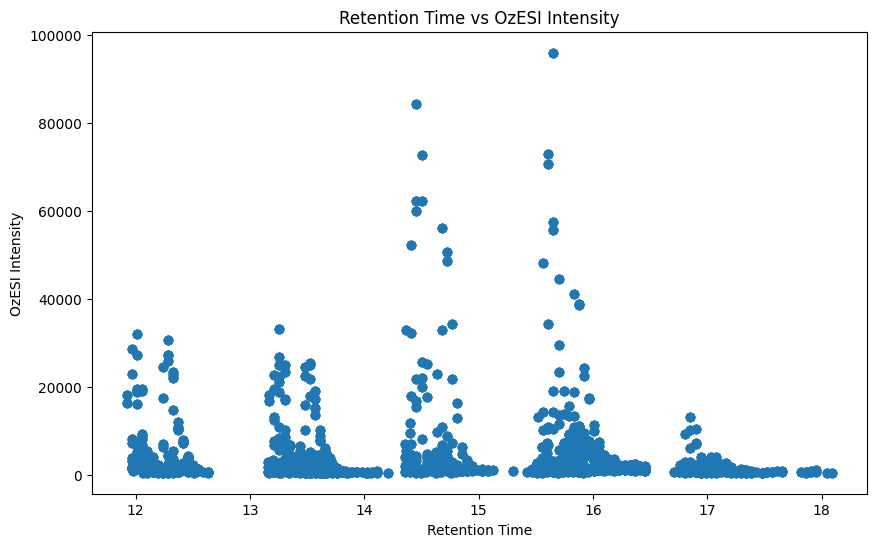

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d4['Retention_Time'], d4['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


In [118]:
grouped_cluster_data = d4.groupby(['Parent_Ion', 'Product_Ion','db'])
#add group number to each to a new column called Group
d4['Group'] = grouped_cluster_data.ngroup()
d4
d5= d4.copy()  # Create a copy of the clustered_data DataFrame
#print transition 870.8 -> 788.8
d5

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Group
1526,736.7,547.5,14.114917,548.920044,11292023_DOD93_F4_5xFAD_cereb_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0
1541,736.7,547.5,13.537633,721.140076,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0
1542,736.7,547.5,13.582033,573.460022,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0
1546,736.7,547.5,13.804067,967.260071,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0
1548,736.7,547.5,14.114917,683.660034,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0
...,...,...,...,...,...,...,...,...,...,...
18467,822.8,633.6,17.822200,748.820068,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19
18468,822.8,633.6,17.866617,559.660034,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19
18469,822.8,633.6,17.911017,878.680054,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19
18503,822.8,633.6,17.866600,510.540039,11292023_FAD189_M2_5xFAD_cereb_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19


Area and RT range

In [119]:
# complete_df = clustered_data.copy()  # Create a copy of the clustered_data DataFrame
# Summing up OzESI_Intensity for each combination of Sample_ID, Parent_Ion, Product_Ion, and Cluster_Label
d5['Area'] = d5.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion','db'])['OzESI_Intensity'].transform('sum').round(0)

#Retenion time range

# Calculate the minimum and maximum Retention_Time for each group
min_rt = d5.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion','db'])['Retention_Time'].transform('min')
max_rt = d5.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion','db'])['Retention_Time'].transform('max')

# Calculate the absolute difference and add it to the dataframe as 'Area_RT'
d5['Area_RT'] = abs(max_rt - min_rt)

# d5.to_excel('canola_OzON_areaValidation.xlsx')
# #print unique Area_RT values
# d5.to_excel('FF_check_area_liver2.xlsx')

d5  # Display the updated dataframe

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Group,Area,Area_RT
1526,736.7,547.5,14.114917,548.920044,11292023_DOD93_F4_5xFAD_cereb_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,2196.0,0.000000
1541,736.7,547.5,13.537633,721.140076,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
1542,736.7,547.5,13.582033,573.460022,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
1546,736.7,547.5,13.804067,967.260071,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
1548,736.7,547.5,14.114917,683.660034,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
...,...,...,...,...,...,...,...,...,...,...,...,...
18467,822.8,633.6,17.822200,748.820068,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,8749.0,0.088817
18468,822.8,633.6,17.866617,559.660034,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,8749.0,0.088817
18469,822.8,633.6,17.911017,878.680054,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,8749.0,0.088817
18503,822.8,633.6,17.866600,510.540039,11292023_FAD189_M2_5xFAD_cereb_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,4365.0,0.088817


Plotting to confirm clusters

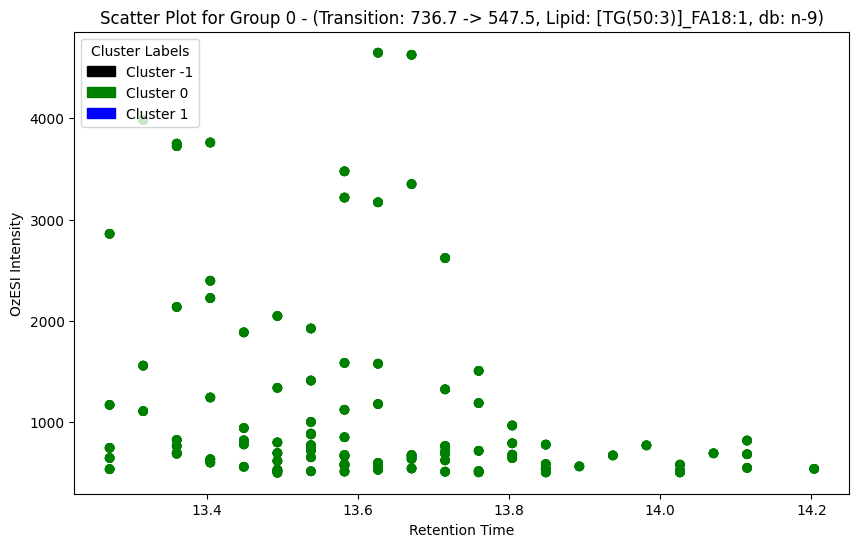

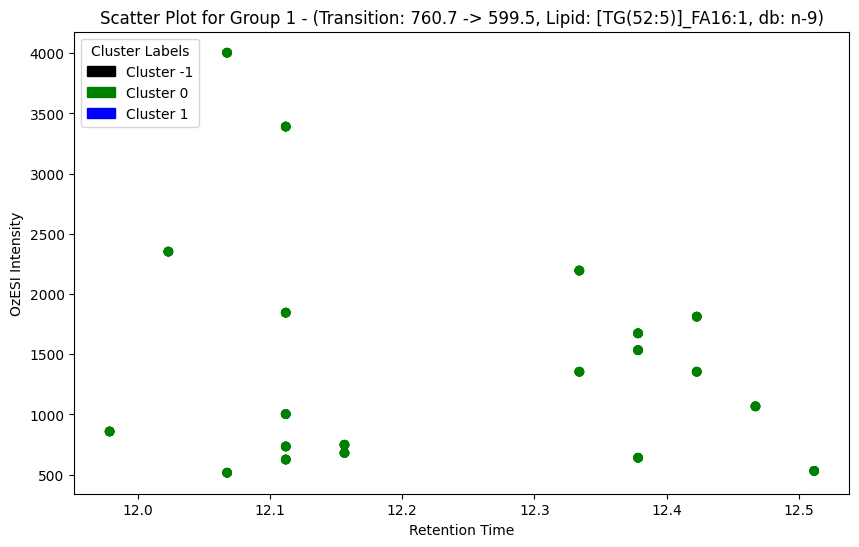

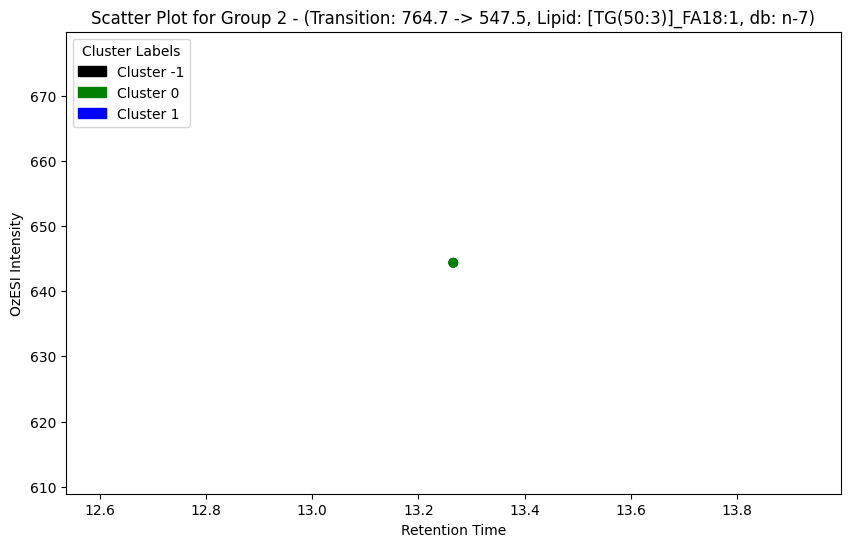

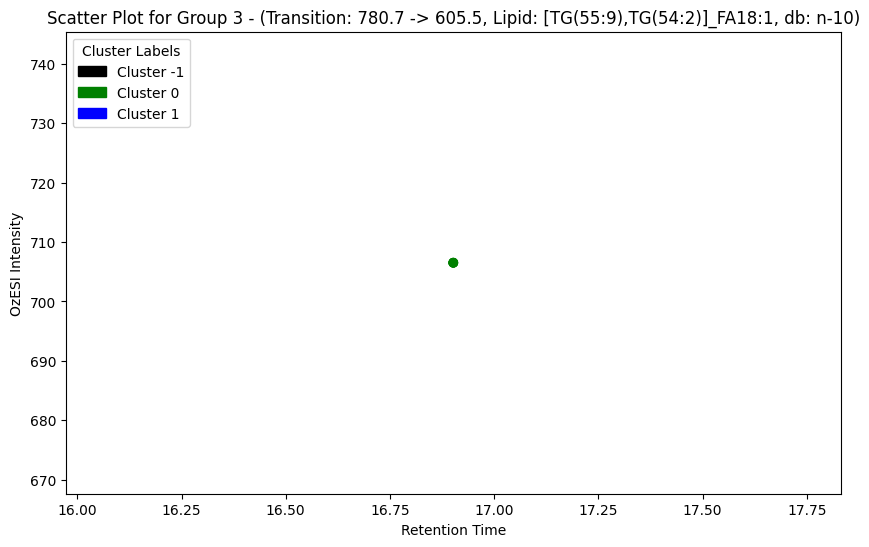

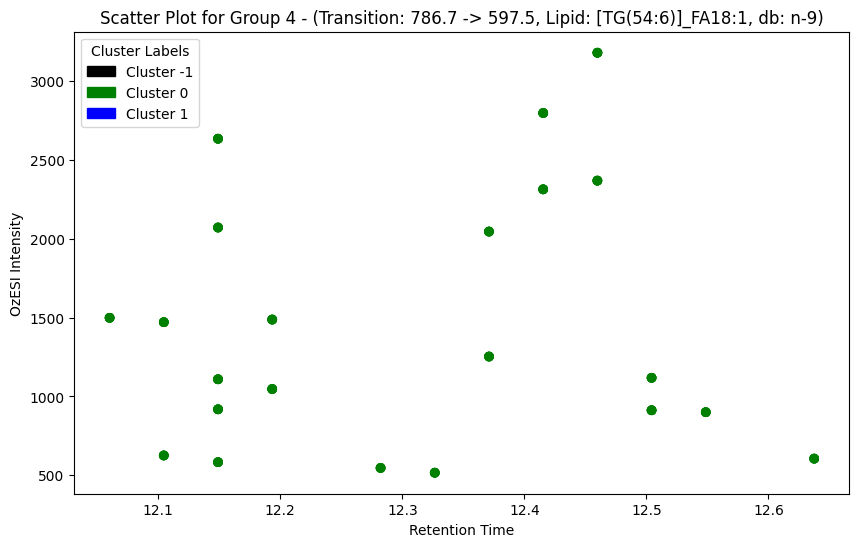

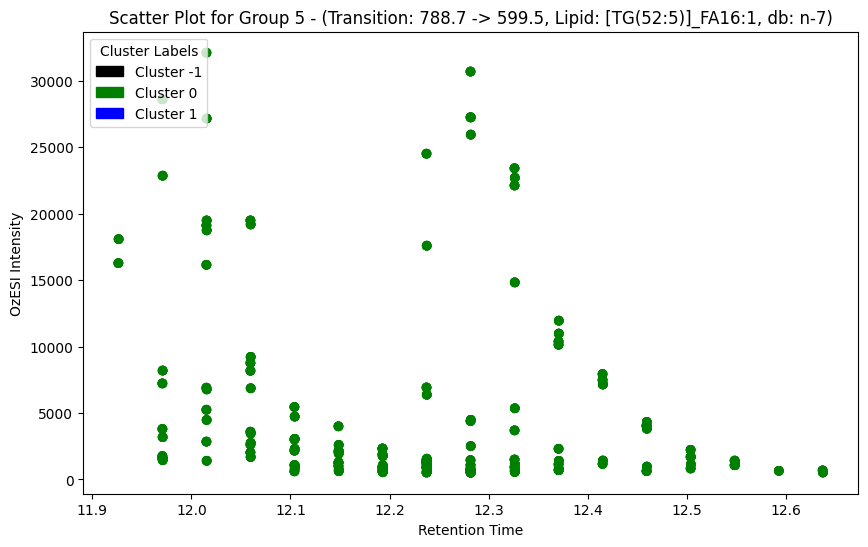

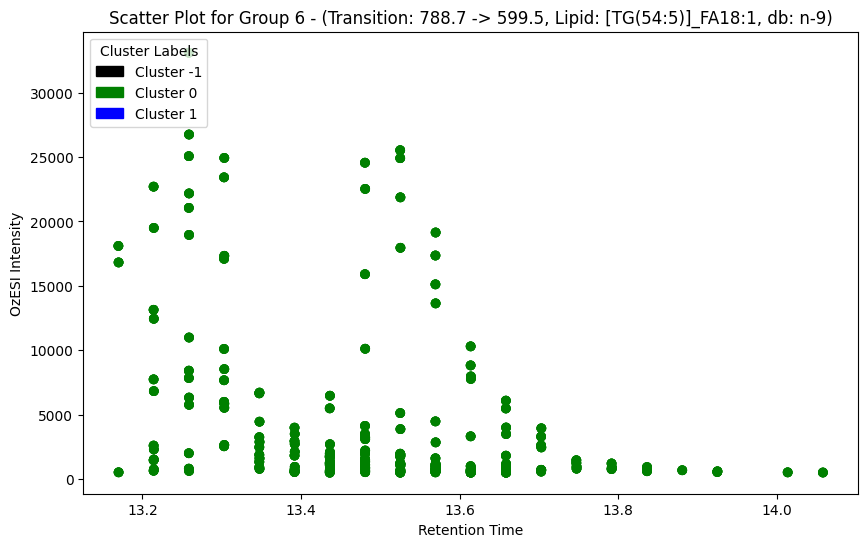

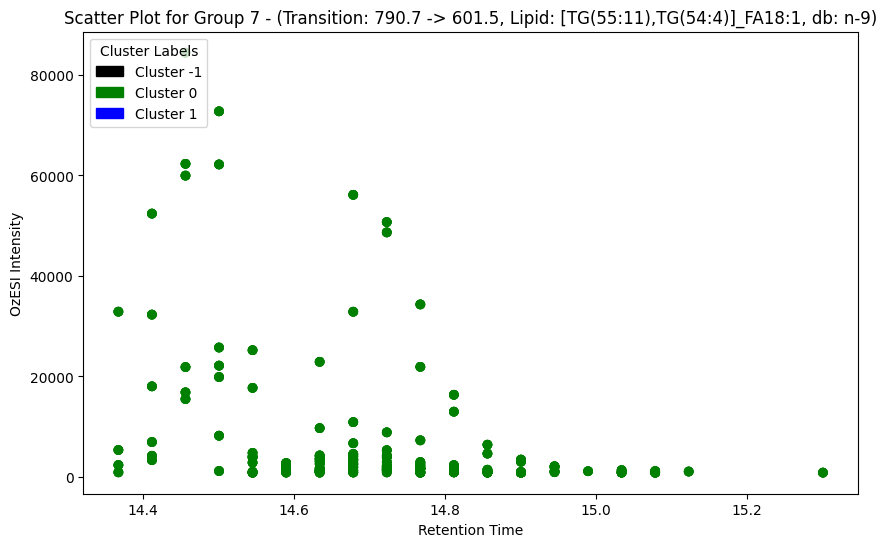

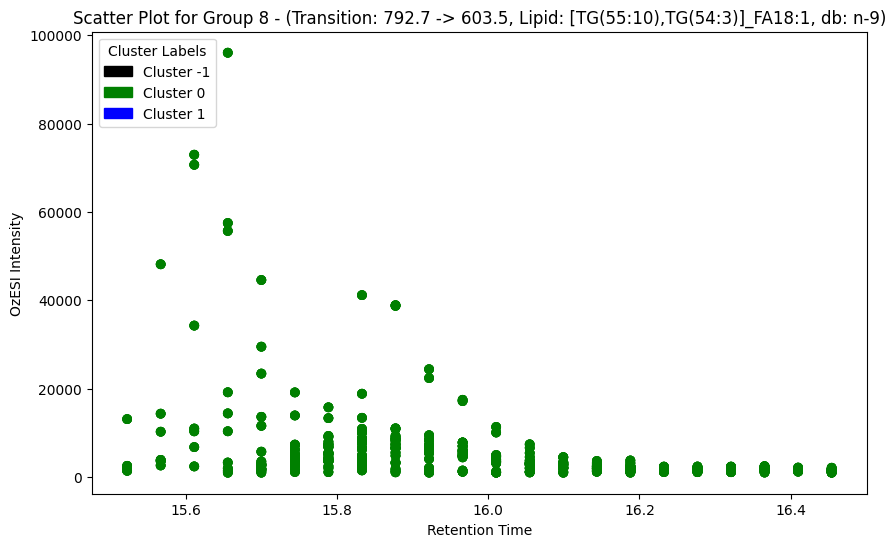

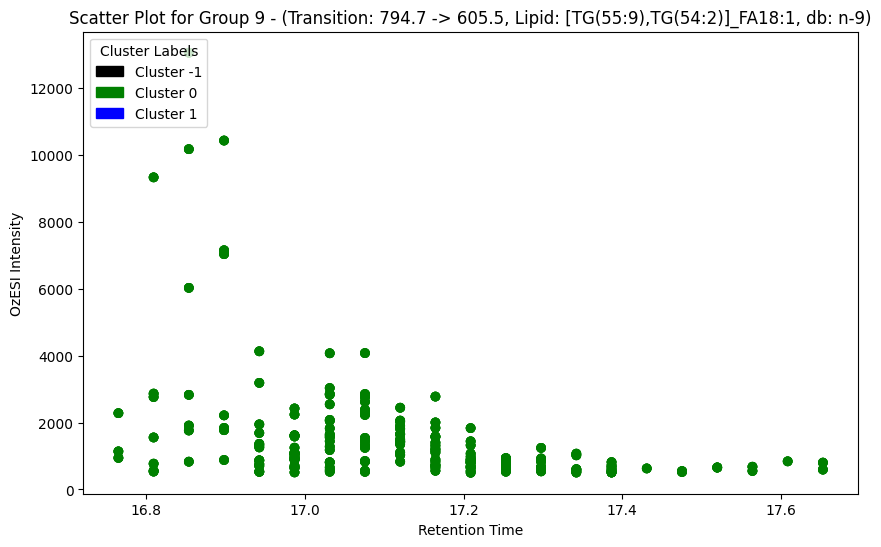

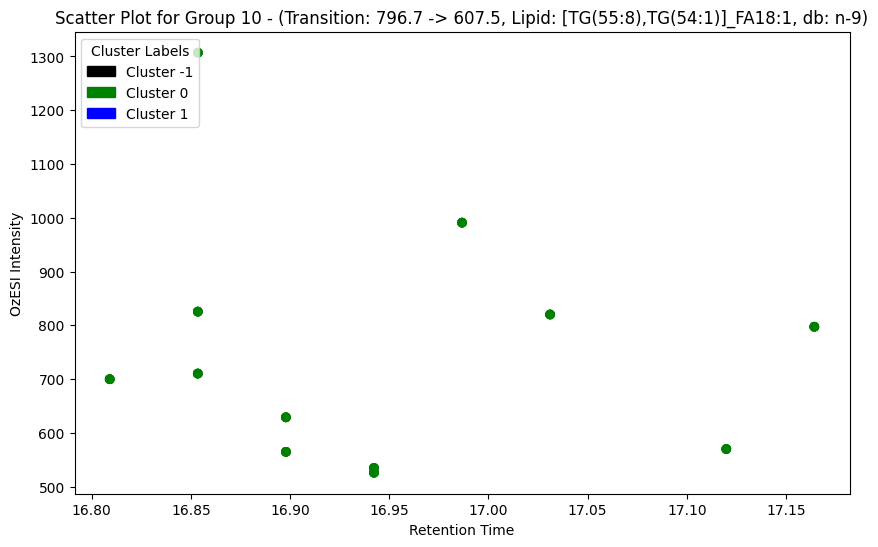

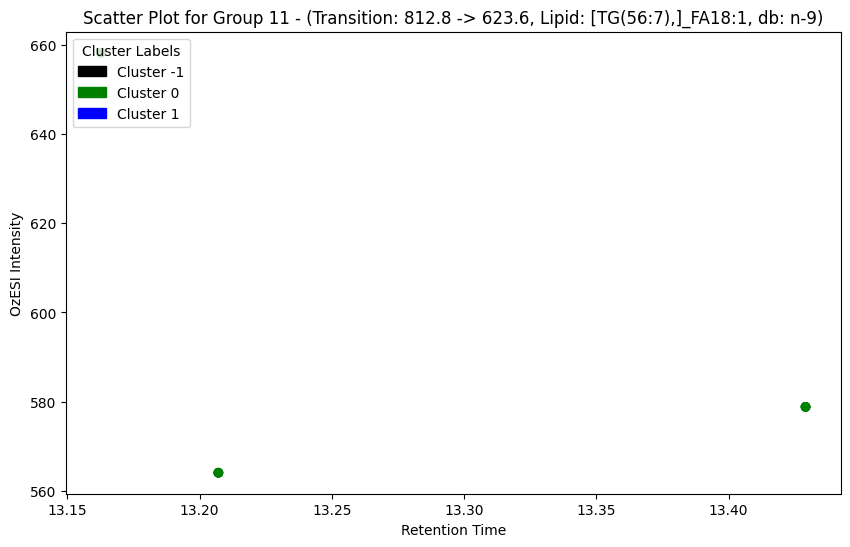

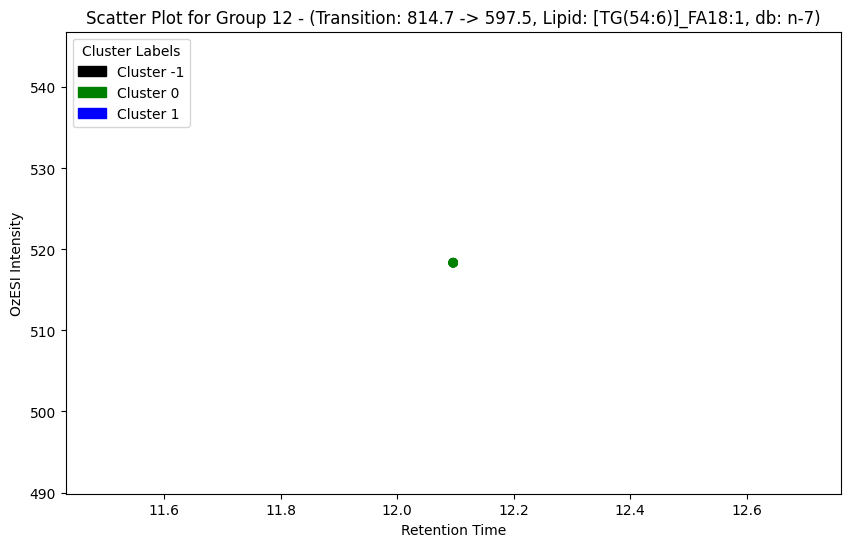

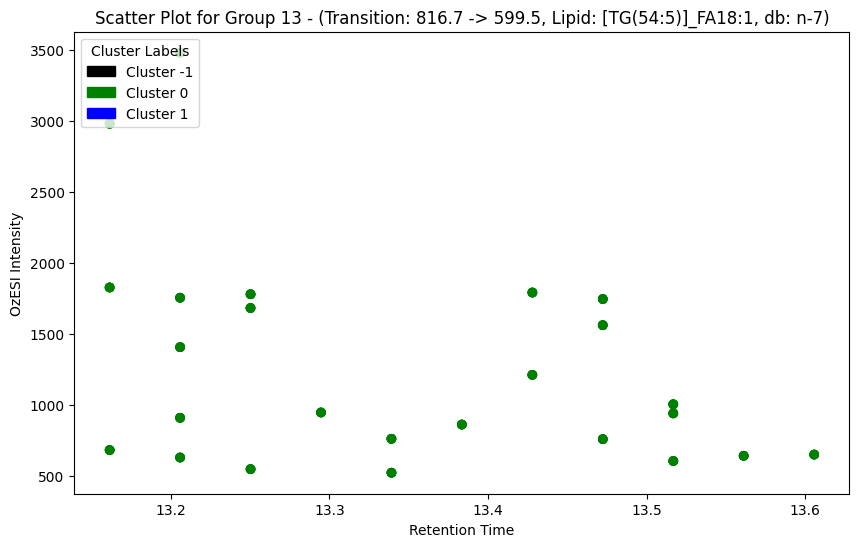

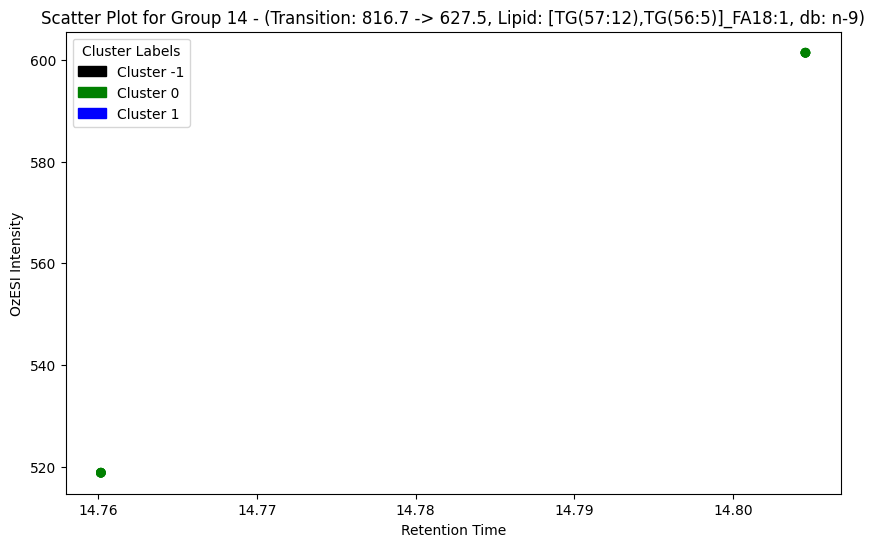

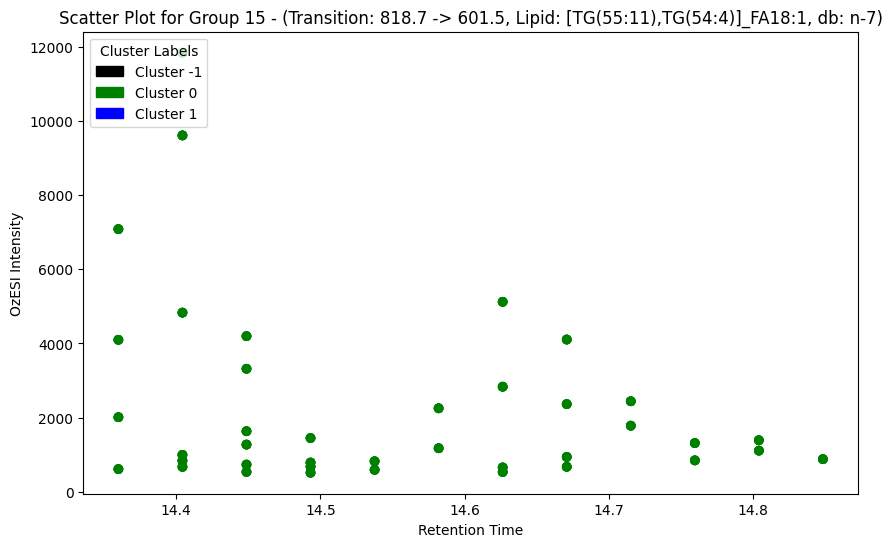

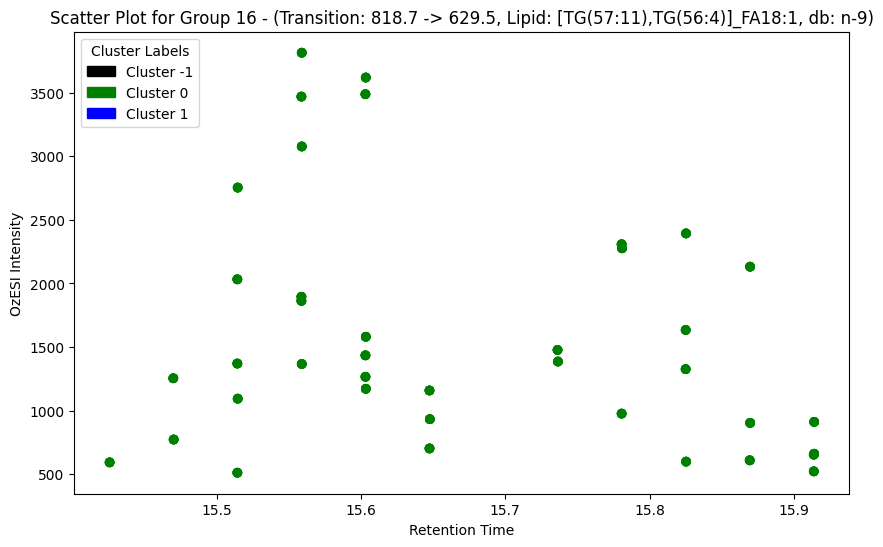

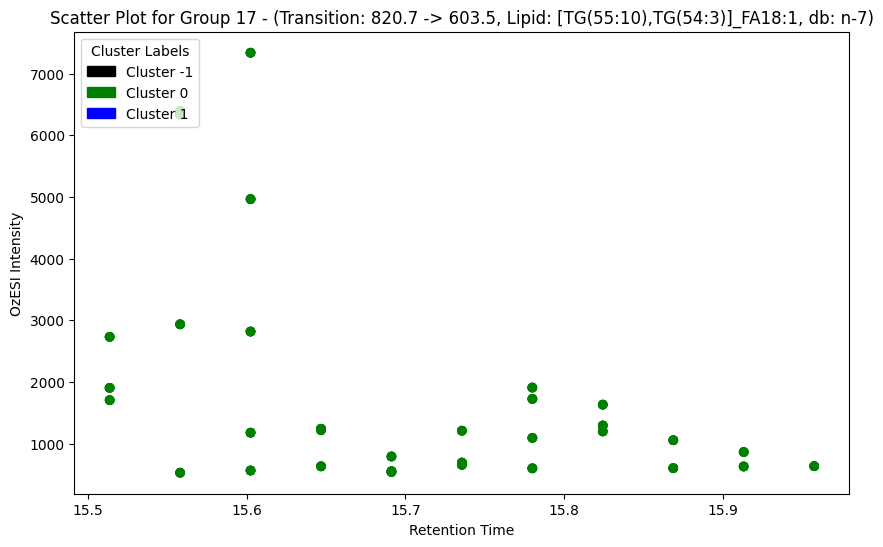

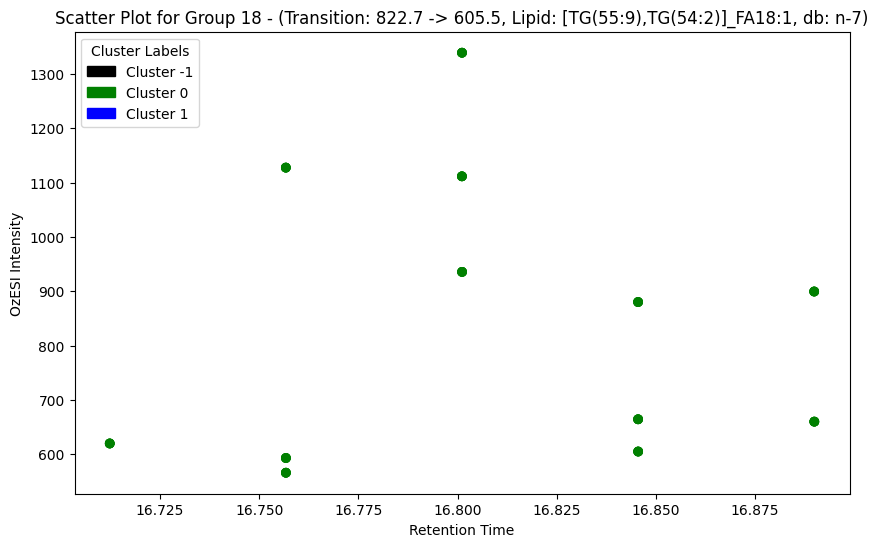

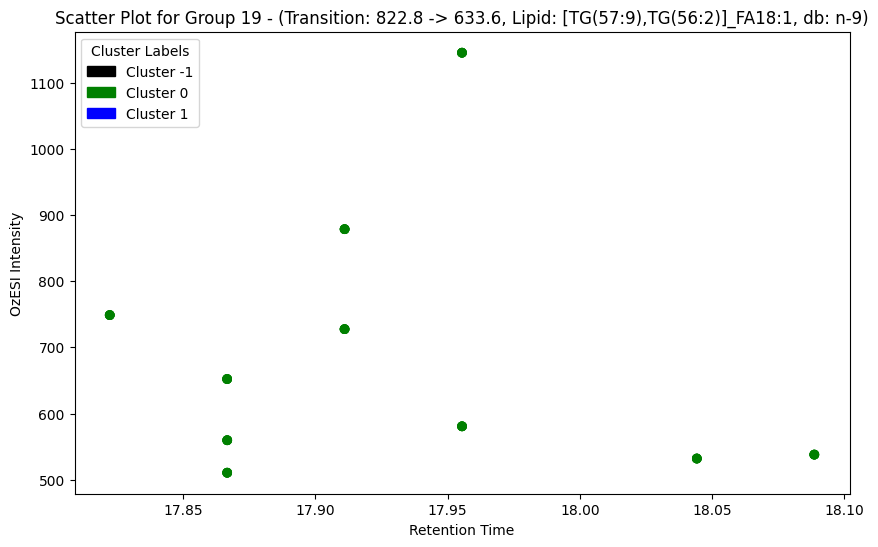

In [120]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

# Define custom colors for the clusters add up to 10 clusters
color_map = {-1: 'black', 0: 'green', 1: 'blue'}
# color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'orange', 5: 'purple', 6: 'brown', 7: 'gray', 8: 'olive', 9: 'cyan'}

# Get unique Group values from complete_df
unique_groups = d5['Group'].unique()

# Iterate through each unique group
for group in unique_groups:
    # Filter the data for each Group
    group_filtered_data = d5[d5['Group'] == group]
    colors = group_filtered_data['Cluster_Label'].map(color_map)

    # Extract the corresponding Transition, Lipid Name, and db value for the group
    transition_value = group_filtered_data['Transition'].iloc[0]
    lipid_name = group_filtered_data['Lipid'].iloc[0]  # Extracting Lipid name
    db_value = group_filtered_data['db'].iloc[0]  # Extracting db value

    # Set up the plot for each group
    plt.figure(figsize=(10, 6))
    plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

    # Add labels and title
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Scatter Plot for Group {group} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

    # Create a legend for the plot
    patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
    plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
    # # Uncomment the following lines if you want to save the plot
    # filename = f'Group_{group}_Lipid_{lipid_name}_Transition_{transition_value}_db_{db_value}.png'
    # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

    # Show the plot
    plt.show()


OzESI double bonds adding

For Loops FOR LOOOOPS

In [121]:
# # Filter retention time from df_OzESI_matched 
# Oz1 = complete_df.copy()
# # Insert a column named 'Lipid' at the first index
# Oz1.insert(0, 'Lipid', '')
# Oz1.insert(8,'db_pos', '')
# # Oz1

# import pandas as pd

# # # Function to check if a value is within a specified tolerance
# def within_tolerance(val1, val2, tolerance):
#     return abs(val1 - val2) <= tolerance

# # Define the list of positions
# db_pos_list = [7, 9, 10, 12]
# columns = [
#     "Lipid"
#     "Parent_Ion",
#     "Product_Ion",
#     "Retention_Time",
#     "OzESI_Intensity",
#     "Sample_ID",
#     "Transition",
#     "Cluster_Label",
# ]

# # Create a new DataFrame with the specified columns
# Oz1b= pd.DataFrame(columns=columns)

# ### 3rd try
# # Iterate through Oz1 DataFrame
# for index, oz_row in Oz1.iterrows():
#     # Initialize variables to accumulate matches
#     matched_lipids = []
#     db_pos_matches = []

#     # For each n-# column in db_pos_list
#     for n in db_pos_list:
#         n_column = f'n-{n}'

#         # Find matches in db_pos_df
#         matches = df_db_pos[
#             within_tolerance(df_db_pos['Product_Ion'], oz_row['Product_Ion'], 0.3) &
#             within_tolerance(df_db_pos[n_column], oz_row['Parent_Ion'], 0.3) &
#             within_tolerance(df_db_pos['Retention_Time'], oz_row['Retention_Time'], 0.2)
#         ]

#         # Accumulate all matched lipids and db_pos values
#         for _, match_row in matches.iterrows():
#             matched_lipids.append(match_row['Lipid'])
#             db_pos_matches.append(n_column)

#     new_row = oz_row.copy()
#     if matched_lipids:
#         new_row['Lipid'] = ', '.join(matched_lipids)
#     if db_pos_matches:
#         new_row['db_pos'] = ', '.join(db_pos_matches)
#     Oz1b = Oz1b.append(new_row, ignore_index=True)

# # Oz1 now contains the updated Lipid and db_pos information for all matches



# Oz1b




In [122]:
d5

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Group,Area,Area_RT
1526,736.7,547.5,14.114917,548.920044,11292023_DOD93_F4_5xFAD_cereb_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,2196.0,0.000000
1541,736.7,547.5,13.537633,721.140076,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
1542,736.7,547.5,13.582033,573.460022,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
1546,736.7,547.5,13.804067,967.260071,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
1548,736.7,547.5,14.114917,683.660034,11292023_DOD93_F4_5xFAD_cortex_O3on_01,736.7 -> 547.5,n-9,[TG(50:3)]_FA18:1,0,0,11782.0,0.577283
...,...,...,...,...,...,...,...,...,...,...,...,...
18467,822.8,633.6,17.822200,748.820068,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,8749.0,0.088817
18468,822.8,633.6,17.866617,559.660034,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,8749.0,0.088817
18469,822.8,633.6,17.911017,878.680054,11292023_FAD185_M3_5xFAD_dienc_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,8749.0,0.088817
18503,822.8,633.6,17.866600,510.540039,11292023_FAD189_M2_5xFAD_cereb_O3on_01,822.8 -> 633.6,n-9,"[TG(57:9),TG(56:2)]_FA18:1",0,19,4365.0,0.088817


In [123]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import os

# # save_dir = 'Projects/canola/plots/validation_oz/'

# # Define custom colors for the clusters add up to 10 clusters
# color_map = {-1: 'black', 0: 'green', 1: 'blue'}
# # color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'orange', 5: 'purple', 6: 'brown', 7: 'gray', 8: 'olive', 9: 'cyan'}

# # Get unique Group values from Oz1b
# unique_groups = Oz1b['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Filter the data for each Group in Oz1b
#     group_filtered_data = Oz1b[Oz1b['Group'] == group]
#     colors = group_filtered_data['Cluster_Label'].map(color_map)

#     # Extract the corresponding Transition and Lipid Name for the group
#     # Assuming that all rows in a group have the same Transition and Lipid Name
#     transition_value = group_filtered_data['Transition'].iloc[0]
#     lipid_name = group_filtered_data['Lipid'].iloc[0]

#     # Set up the plot for each group
#     plt.figure(figsize=(10, 6))
#     plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title(f'Scatter Plot for Group {group} - {lipid_name} (Transition: {transition_value})')

#     # Create a legend for the plot
#     patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
#     plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
#     # # Save the plot as a PNG file in the specified directory
#     # filename = f'Group_{group}_{lipid_name}_Transition_{transition_value}.png'
#     # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

#     # Show the plot
#     plt.show()


In [124]:
#based on sample_ID Lipid and db pos, keep the unique value with the highest intensity
# Sort the DataFrame by 'OzESI_Intensity' in descending order to ensure the highest intensity is first

d6 = d5.copy()
# Assuming your DataFrame is named d6
d6 = d6[d6['db'] != '']
d6


# # Group by 'Lipid' and 'db_pos', then find the index of the row with the highest 'OzESI_Intensity' in each group
# indices_of_max_intensity = Oz2.groupby(['Lipid','Sample_ID', 'db'])['OzESI_Intensity'].idxmax()

# # Use these indices to filter your DataFrame
# Oz2_filtered = Oz2.loc[indices_of_max_intensity]
# print(len(Oz2_filtered))
# Oz2_sorted = Oz2_filtered.sort_values(by='OzESI_Intensity', ascending=False)
#sort Oz2 by Sample_ID, then Lipid then db_pos

#sort d6 by max OzESI_Intensity
d6 = d6.sort_values(by='OzESI_Intensity', ascending=False)

d6 = d6.groupby(['Lipid', 'Sample_ID', 'db']).first().reset_index()



#round the retention time to 2 decimal places
d6['Retention_Time'] = d6['Retention_Time'].round(2)
#round intensity to 0 decimal places
d6['OzESI_Intensity'] = d6['OzESI_Intensity'].round(0)

# show all TG(52:5) & db = n-10
# Filter for rows where 'Lipid' contains 'TG(52:5)' and 'db' contains 'n-10'
filtered_rows = d6[(d6['Lipid'].str.contains('TG\(54:2\)')) & (d6['db'] == 'n-10')]

filtered_rows

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT
169,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-10,780.7,605.5,16.9,707.0,780.7 -> 605.5,0,3,2826.0,0.0


Calculate Area Ratio

In [125]:
# import pandas as pd

# # Filter for 'n-9' and 'n-7' in the 'db' column
# filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# # Group by 'Lipid' and 'Sample_ID'
# grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# # DataFrame for Area Ratios
# area_ratios = pd.DataFrame(columns=['Lipid', 'Sample_ID', 'Area_Ratio'])

# # Calculate Area Ratio for each group
# for (lipid, sample_id), group in grouped:
#     n9_area = group[group['db'] == 'n-9']['Area'].sum()  # Sum if there are multiple 'n-9' entries
#     n7_area = group[group['db'] == 'n-7']['Area'].sum()  # Sum if there are multiple 'n-7' entries
#     ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

#     # Append to DataFrame
#     area_ratios = area_ratios.append({
#         'Lipid': lipid,
#         'Sample_ID': sample_id,
#         'Area_Ratio': ratio
#     }, ignore_index=True)

# # Merge the Area Ratio DataFrame with the original DataFrame
# d7 = pd.merge(d6, area_ratios, on=['Lipid', 'Sample_ID'], how='left')

# d7.head(50)  # Display the updated DataFrame with 'Area_Ratio'


In [126]:
import pandas as pd

# Assume d6 is your original DataFrame

# Filter for 'n-9' and 'n-7' in the 'db' column
filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# Group by 'Lipid' and 'Sample_ID'
grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# Initialize Area_Ratio column in the original DataFrame
d6['Area_Ratio'] = None

# Calculate Area Ratio for each group and update the original DataFrame
for (lipid, sample_id), group in grouped:
    if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
        n9_area = group[group['db'] == 'n-9']['Area'].sum()
        n7_area = group[group['db'] == 'n-7']['Area'].sum()
        ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

        # Update only relevant rows in the original DataFrame
        indices = d6[(d6['Lipid'] == lipid) & (d6['Sample_ID'] == sample_id) & (d6['db'].isin(['n-9', 'n-7']))].index
        d6.loc[indices, 'Area_Ratio'] = ratio

# Now d6 should have the correctly assigned Area_Ratio
d6  # Display the updated DataFrame


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT,Area_Ratio
0,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cereb_O3on_01,n-9,736.7,547.5,14.11,549.0,736.7 -> 547.5,0,0,2196.0,0.000000,None
1,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cortex_O3on_01,n-9,736.7,547.5,13.80,967.0,736.7 -> 547.5,0,0,11782.0,0.577283,None
2,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-9,736.7,547.5,13.27,746.0,736.7 -> 547.5,0,0,15161.0,0.799333,None
3,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_hippo_O3on_01,n-9,736.7,547.5,13.80,679.0,736.7 -> 547.5,0,0,14066.0,0.355250,None
4,[TG(50:3)]_FA18:1,11292023_DOD94_F4_5xFAD_cereb_O3on_01,n-9,736.7,547.5,13.49,2048.0,736.7 -> 547.5,0,0,47210.0,0.621700,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,"[TG(57:9),TG(56:2)]_FA18:1",11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-9,822.8,633.6,18.04,532.0,822.8 -> 633.6,0,19,2128.0,0.000000,None
195,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-9,822.8,633.6,18.09,538.0,822.8 -> 633.6,0,19,2152.0,0.000000,None
196,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,822.8,633.6,17.96,1145.0,822.8 -> 633.6,0,19,10100.0,0.088817,None
197,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M3_5xFAD_dienc_O3on_01,n-9,822.8,633.6,17.91,879.0,822.8 -> 633.6,0,19,8749.0,0.088817,None


FAC and TG sorting

In [127]:
import pandas as pd

# Assume d6 is your DataFrame

# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
d6['FAC'] = d6['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
d6['TG'] = d6['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
d6['TG'] = d6['TG'].apply(sort_tg_values)
d6 = d6.sort_values(by=['FAC', 'TG'])

# d6.to_csv('Projects/FaceFats/plots/plot_data/FF_d6_Brain5xFAD.csv')
# # Display the DataFrame
d6


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT,Area_Ratio,FAC,TG
22,[TG(52:5)]_FA16:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-7,788.7,599.5,12.24,586.0,788.7 -> 599.5,0,5,2344.0,0.000000,None,FA16:1,TG(52:5)
23,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1418.0,788.7 -> 599.5,0,5,29574.0,0.177633,None,FA16:1,TG(52:5)
24,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.24,931.0,788.7 -> 599.5,0,5,13386.0,0.089067,None,FA16:1,TG(52:5)
25,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1340.0,788.7 -> 599.5,0,5,27282.0,0.177633,None,FA16:1,TG(52:5)
26,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.28,2509.0,788.7 -> 599.5,0,5,48724.0,0.177633,None,FA16:1,TG(52:5)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,"[TG(57:12),TG(56:5)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,816.7,627.5,14.80,601.0,816.7 -> 627.5,0,14,2406.0,0.000000,None,FA18:1,"TG(56:5), TG(57:12)"
193,"[TG(57:12),TG(56:5)]_FA18:1",11292023_FAD185_M3_5xFAD_dienc_O3on_01,n-9,816.7,627.5,14.76,519.0,816.7 -> 627.5,0,14,2075.0,0.000000,None,FA18:1,"TG(56:5), TG(57:12)"
184,"[TG(56:7),]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,812.8,623.6,13.21,564.0,812.8 -> 623.6,0,11,2256.0,0.000000,None,FA18:1,TG(56:7)
185,"[TG(56:7),]_FA18:1",11292023_FAD185_M3_5xFAD_dienc_O3on_01,n-9,812.8,623.6,13.16,658.0,812.8 -> 623.6,0,11,2633.0,0.000000,None,FA18:1,TG(56:7)


SECOND RT WINDOW

In [128]:
import pandas as pd

# Assuming d6 and df_db_pos are your DataFrames and user_window is the time window specified by the user
user_window = 0.25  # Replace 0.5 with the value specified by the user

# Copy d6 to d7
d7 = d6.copy()

# Iterate over each row in d7
for index, row in d7.iterrows():
    # Extract Lipid and Retention_Time from the row in d7
    lipid = row['Lipid']
    retention_time_d7 = row['Retention_Time']

    # Find the corresponding row in df_db_pos
    df_db_pos_row = df_db_pos[df_db_pos['Lipid'] == lipid]

    # Check if the lipid was found in df_db_pos
    if not df_db_pos_row.empty:
        # Extract the Average_Retention_Time from df_db_pos
        retention_time_db_pos = df_db_pos_row.iloc[0]['Average_Retention_Time']

        # Check if the retention time in d7 is outside the specified window
        if abs(retention_time_d7 - retention_time_db_pos) > user_window:
            # Remove the row from d7 if it is outside the window
            d7.drop(index, inplace=True)

#show all TG(52:5)
d7[d7['Lipid'].str.contains('TG\(54:3\)')].head(60)
d7.to_csv('Projects/FaceFats/plots/plot_data/FF_d7_Brain5xFAD_area_21Dec23.csv')
d7.to_excel('Projects/FaceFats/plots/plot_data/FF_d7_Brain5xFAD_area_21Dec23.xlsx')


# Searching for the Lipid column with 'TG(54:1)'
tg_54_1_rows = d7[d7['Lipid'].str.contains('TG\(54:2\)')]

tg_54_1_rows
# d7

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT,Area_Ratio,FAC,TG
157,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD93_F4_5xFAD_cereb_O3on_01,n-9,794.7,605.5,17.08,2329.0,794.7 -> 605.5,0,9,40148.0,0.621700,None,FA18:1,"TG(54:2), TG(55:9)"
158,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD93_F4_5xFAD_cortex_O3on_01,n-9,794.7,605.5,17.12,2027.0,794.7 -> 605.5,0,9,45614.0,0.577300,None,FA18:1,"TG(54:2), TG(55:9)"
159,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-9,794.7,605.5,17.03,2860.0,794.7 -> 605.5,0,9,51210.0,0.444067,None,FA18:1,"TG(54:2), TG(55:9)"
160,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD93_F4_5xFAD_hippo_O3on_01,n-9,794.7,605.5,17.12,1901.0,794.7 -> 605.5,0,9,36534.0,0.399667,None,FA18:1,"TG(54:2), TG(55:9)"
161,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD94_F4_5xFAD_cereb_O3on_01,n-9,794.7,605.5,17.03,4075.0,794.7 -> 605.5,0,9,68692.0,0.444067,None,FA18:1,"TG(54:2), TG(55:9)"
162,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-9,794.7,605.5,17.03,3034.0,794.7 -> 605.5,0,9,49793.0,0.310850,None,FA18:1,"TG(54:2), TG(55:9)"
163,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD94_F4_5xFAD_dienc_O3on_01,n-9,794.7,605.5,17.03,2548.0,794.7 -> 605.5,0,9,45386.0,0.621700,None,FA18:1,"TG(54:2), TG(55:9)"
164,"[TG(55:9),TG(54:2)]_FA18:1",11292023_DOD94_F4_5xFAD_hippo_O3on_01,n-9,794.7,605.5,17.12,2445.0,794.7 -> 605.5,0,9,36498.0,0.355250,None,FA18:1,"TG(54:2), TG(55:9)"
165,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-9,794.7,605.5,17.12,1402.0,794.7 -> 605.5,0,9,29179.0,0.577300,None,FA18:1,"TG(54:2), TG(55:9)"
166,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-9,794.7,605.5,17.03,1610.0,794.7 -> 605.5,0,9,31647.0,0.488467,None,FA18:1,"TG(54:2), TG(55:9)"


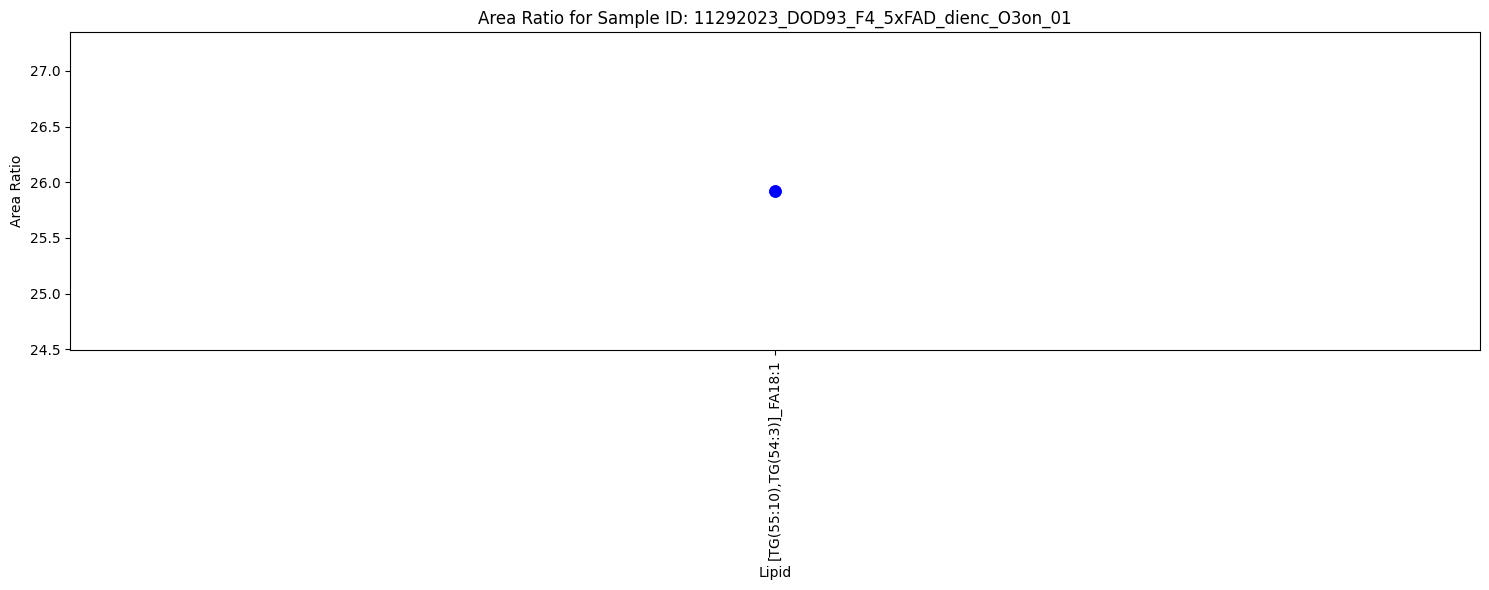

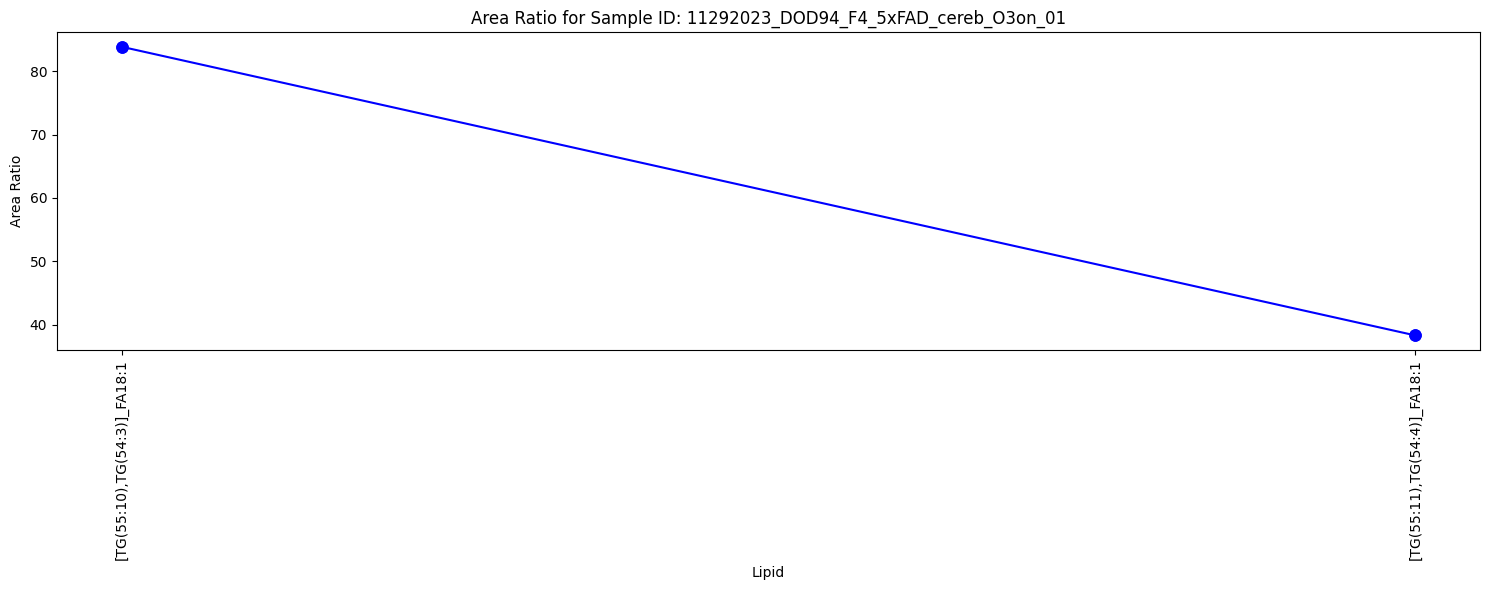

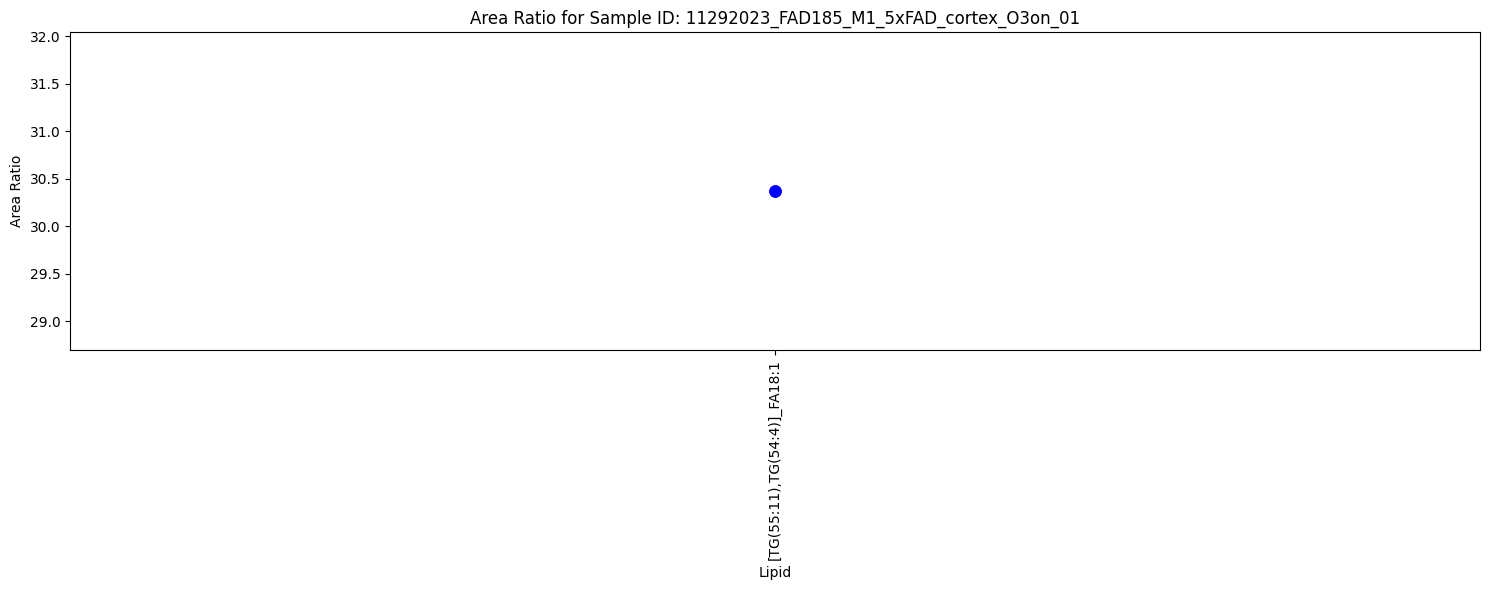

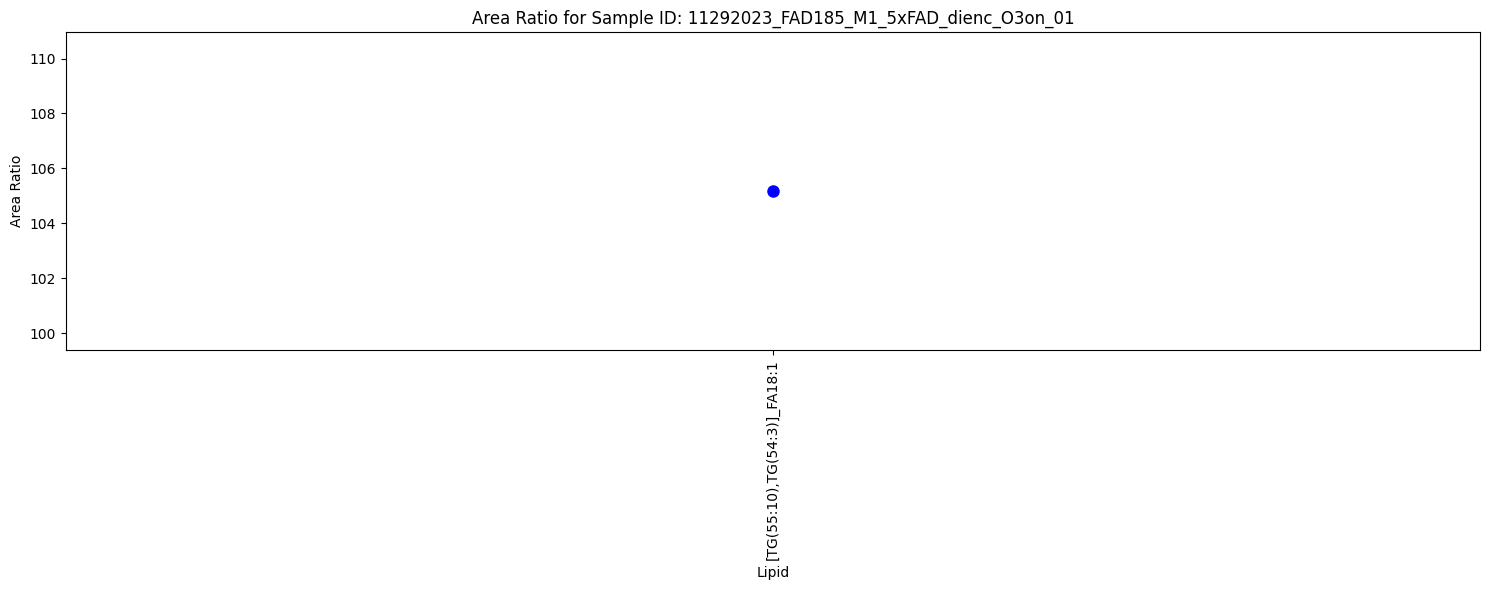

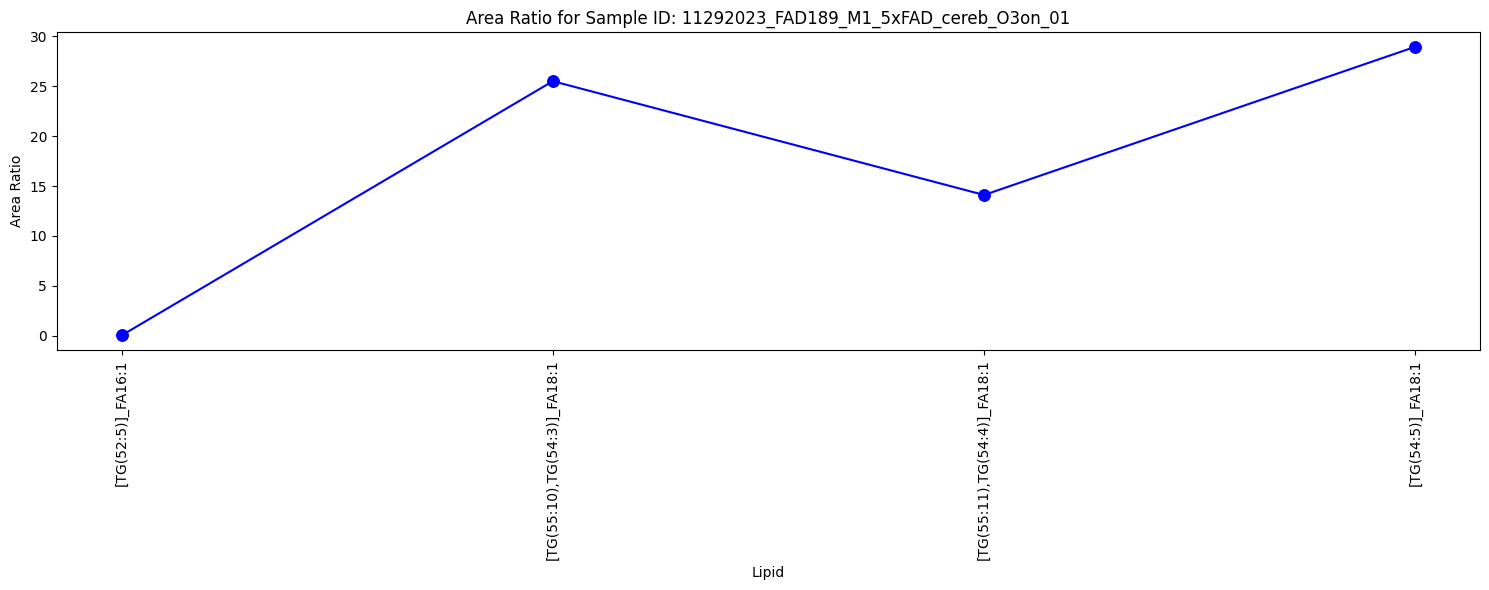

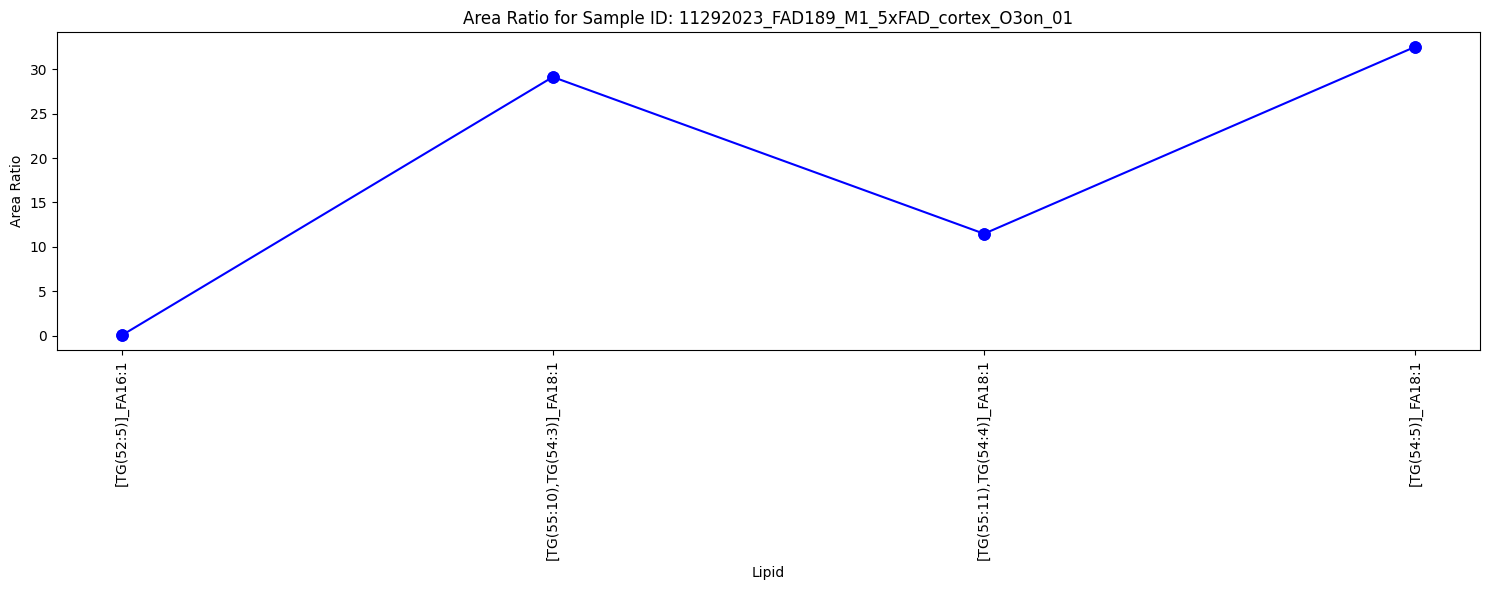

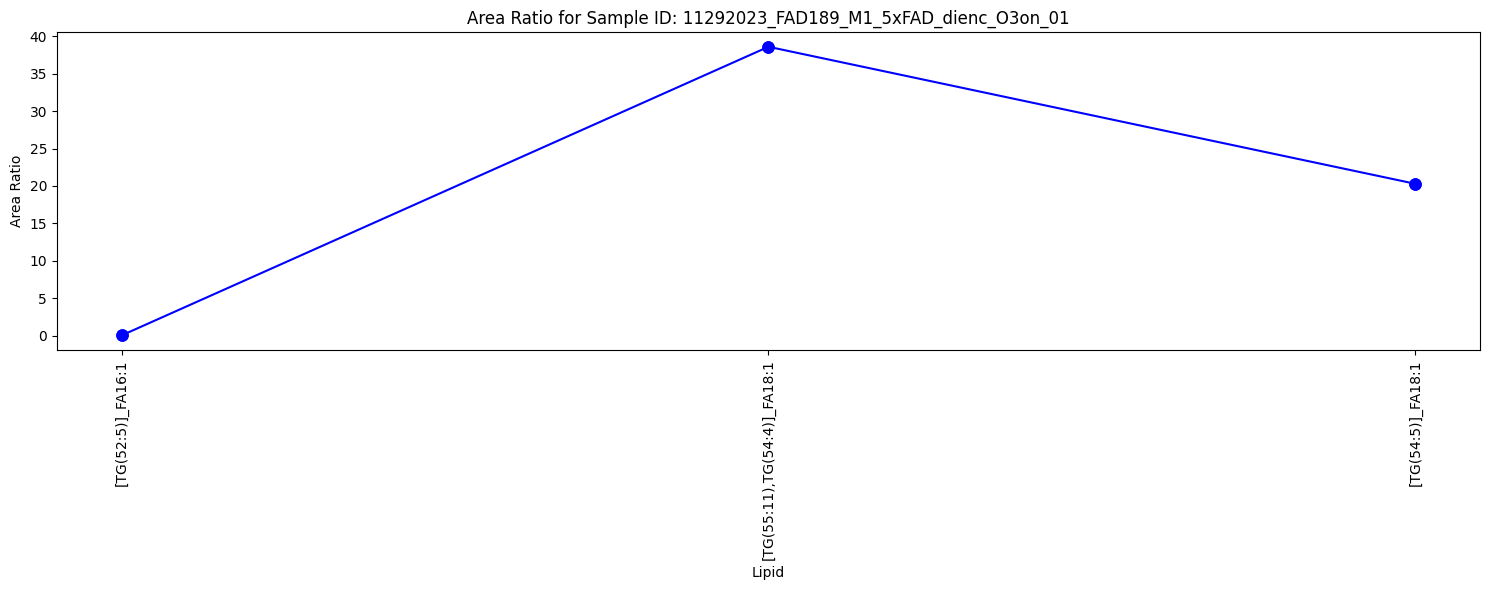

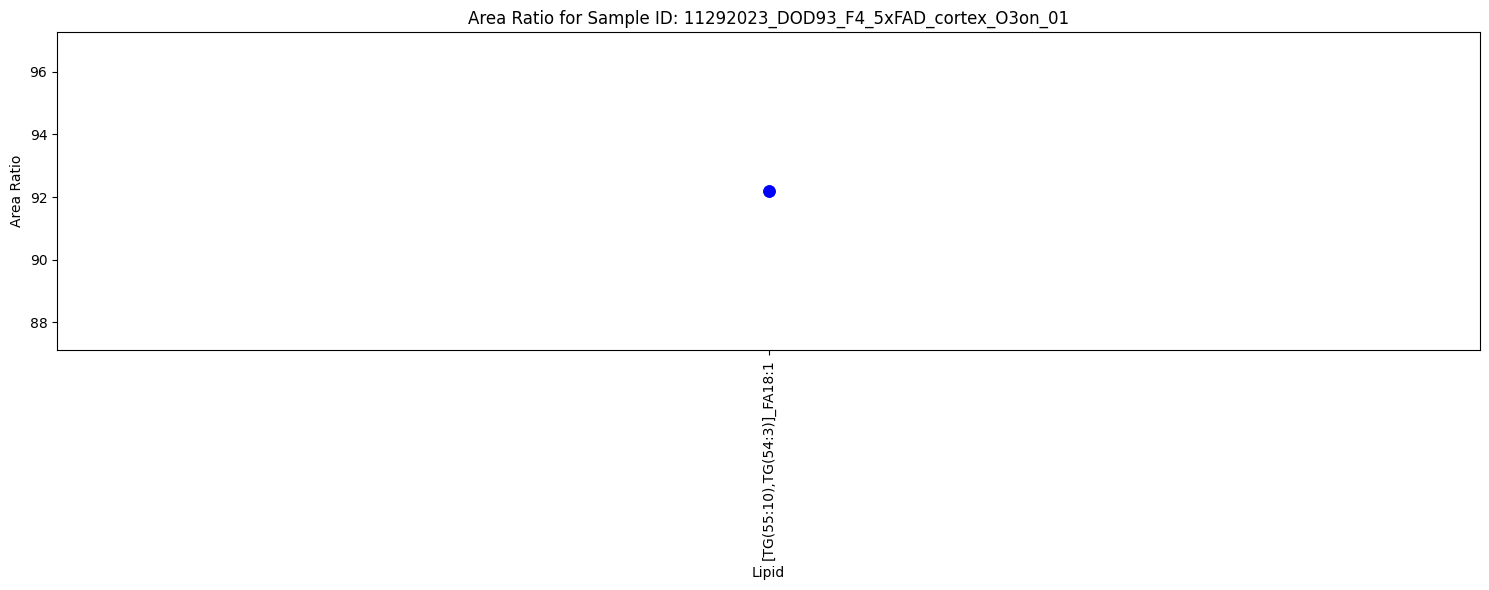

In [129]:
import matplotlib.pyplot as plt
import os

# Assuming d6 is your DataFrame



# Get unique Sample_ID values
unique_sample_ids = d7['Sample_ID'].unique()

# Loop through each Sample_ID and create a separate plot
for sample_id in unique_sample_ids:
    # Filter the sorted DataFrame for the current Sample_ID
    df_filtered = d7[d7['Sample_ID'] == sample_id]

    # Removing rows where Ratio is NaN or 0
    df_filtered = df_filtered[df_filtered['Area_Ratio'].notna() & (df_filtered['Area_Ratio'] != 0)]

    # Skip plotting if there are no valid data points left after filtering
    if df_filtered.empty:
        continue

    # Setting up the plot
    plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

    # Plotting with larger dots
    plt.plot(df_filtered['Lipid'], df_filtered['Area_Ratio'], color='blue', marker='o', linestyle='-', markersize=8)

    # Adding labels and title
    plt.xlabel('Lipid')
    plt.ylabel('Area Ratio')
    plt.title(f'Area Ratio for Sample ID: {sample_id}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # # Save plot
    # # Uncomment and adjust the directory as needed
    # plt.savefig(os.path.join(save_dir, f'Area Ratio for Sample ID - {sample_id}.png'), bbox_inches='tight')

    plt.tight_layout()
    plt.show()
    plt.close()  # Close the plot to free up memory
